<a href="https://colab.research.google.com/github/Mars095/Clothes-Dataset/blob/main/Copia_de_Copia_de_Basic_classification_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example basic classification
Using keras for a classification problem

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


Ahora vamos a cargar los datos que provienen de la base de datos de Zalando

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

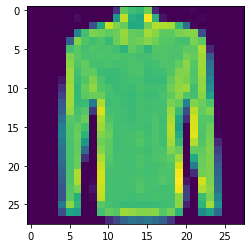

In [ ]:
plt.figure(16)
plt.cm.binary
plt.imshow(train_images[40])
plt.gca().grid(False)

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

ValueError: ignored

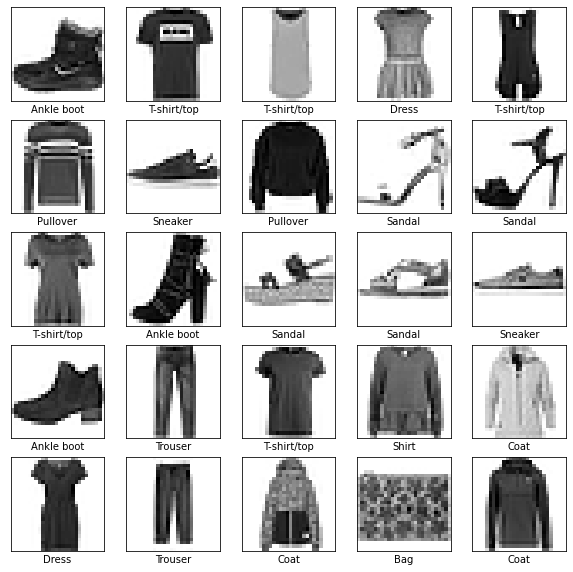

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,5
                ,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1299 - accuracy: 0.6564
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6450 - accuracy: 0.7682
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5640 - accuracy: 0.7975
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5201 - accuracy: 0.8149
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4910 - accuracy: 0.8262


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.5068 - accuracy: 0.8193
Test accuracy: 0.8192999958992004


Creamos el modelo predictivo

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[12]

In [ ]:
np.argmax(predictions[12])

In [ ]:
class_names[7]

In [ ]:
test_labels[12]

In [ ]:
class_names[test_labels[12]]

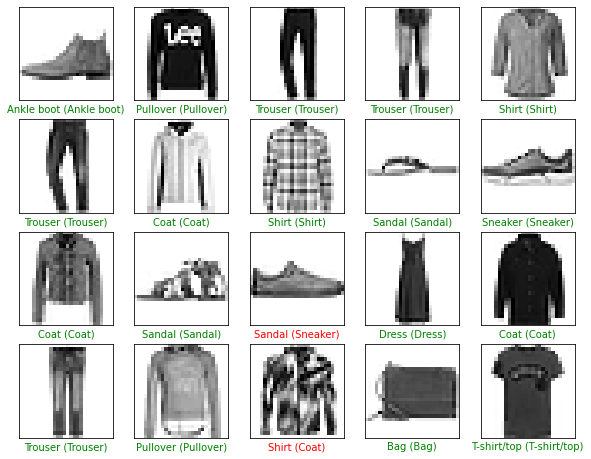

In [ ]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

In [ ]:
# Grab an image from the test dataset
img = test_images[6]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions = model.predict(img)

print(predictions)

[[2.1558443e-02 2.8866236e-03 9.1221660e-02 2.1896993e-03 5.7651132e-01
  2.5982872e-04 2.9583335e-01 1.0118733e-06 9.5363986e-03 1.7579958e-06]]


In [ ]:
prediction = predictions[0]

np.argmax(prediction)

4

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
# This is a model was created by Francou Chollet. I have modified and exerimented with the Zalando´s dataset
# We have a model predictive which can help us to discover the textile product.